## Introduction 

This notebook outlines a pipeline to obtain a ML-based cactus identifier. This consists of the following steps:

* create dataset using images search
* train a demo model
* clean dataset and train a final model

Plus some reflections at the end.

## Create own dataset from Google Images

Credits: fastai. Inspired by Adrian Rosebrock at PyImageSearch

In [1]:
from tqdm import tqdm
from fastai import *
from fastai.vision import *

## I'm just gonna copy the instructions here

#### Get the URLs 
Right, so to start go to images.google.com and start searching, as specific as possible e.g. must contain some words, must exclude some distracting words etc.

Keep scrolling, the max number apparently is 700, which for a pre-trained model is aplenty.

Then we do some Javascript code in the browser to save the URLs of the images - I guess to download later. In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.

Might be a good idea to turn off ad-blocking for a bit, so window.open() doesn't get blocked. Then run the following:

The similar code for bing goes like this:

var urls=Array.from(document.querySelectorAll(".mimg")).map(el=>el.hasAttribute("src")?el.getAttribute("src"):null).filter(l=>l!=null&&l.startsWith("http")).join("\n");
var a = document.createElement("a");a.download = "filename.txt";a.href = "data:text/csv;charset=utf-8,"+urls;a.click();

#### Then we can save and store the URLs for fastai to download from later. For the moment we're having issues obtaining the original URLs - so we're only obtaining the small copies of the images

#### For the project, we're downloading images from both google search and bing. We'll add 'bing', 'google' to the images names and join them offline to make a final folder of images. The downloading goes as follows:

In [8]:
#cactus_project_dir = './Data/'
#cactus_project_dir = 'C:/Users/htngu/MachineLearning/Cactus_Identifier_Project/Data/'
cactus_project_dir = 'Data/train/'

In [9]:
cactus_sources = ['bing','google']
for cactus_source in cactus_sources:
    path = Path(cactus_project_dir)/cactus_source

    urls = [file for file in os.listdir(cactus_project_dir) if '.txt' in file]
    classes = ['_'.join(url.split('_')[1:]).split('.')[0] for url in urls]
    
    print('Downloading...')
    for i, folder in tqdm(enumerate(classes)):
        file = urls[i]
        dest = path/folder
        dest.mkdir(parents=True, exist_ok=True)
        download_images(path/file, dest)

    #### renaming files downloaded from bing or google, 
    #### for some reason
    #### the files downloaded from bing are not as .png 
    #### which we had to intervene
    print('Renaming...')
    for folder in tqdm(classes):
        print(folder)
        dest = path/folder
        #verify_images(dest, delete=False, img_format='jpeg')
        for file in os.listdir(dest):
            if cactus_source == 'bing':
                end_file_name = 'png'
            else:
                end_file_name = file.split('.')[-1]
            base_file_name = '.'.join(file.split('.')[:-1]) + '_' + cactus_source
            new_file_name = '.'.join([base_file_name, end_file_name])
            os.rename(dest/file, dest/new_file_name)


0it [00:00, ?it/s]

Downloading...



1it [00:20, 20.77s/it]


2it [00:39, 20.01s/it]


3it [00:54, 18.52s/it]


4it [01:11, 18.22s/it]


5it [01:23, 16.41s/it]


6it [01:45, 17.56s/it]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Renaming...
ariocarpus_retusus



 17%|██████████████                                                                      | 1/6 [00:00<00:02,  1.92it/s]

astrophytum_asterias



 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.02it/s]

coryphantha



 50%|██████████████████████████████████████████                                          | 3/6 [00:01<00:01,  2.05it/s]

gymnocalycium_variegated



 67%|████████████████████████████████████████████████████████                            | 4/6 [00:01<00:00,  2.05it/s]

lophophora_diffusa



 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:02<00:00,  2.06it/s]

mammillaria_plumosa



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.07it/s]

0it [00:00, ?it/s]

Downloading...



1it [00:15, 15.42s/it]


2it [00:29, 14.95s/it]


3it [00:46, 15.75s/it]


4it [01:01, 15.54s/it]


5it [01:18, 15.74s/it]


6it [01:32, 15.43s/it]

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

Renaming...
ariocarpus_retusus



 17%|██████████████                                                                      | 1/6 [00:00<00:01,  2.51it/s]

astrophytum_asterias



 33%|████████████████████████████                                                        | 2/6 [00:00<00:01,  2.65it/s]

coryphantha



 50%|██████████████████████████████████████████                                          | 3/6 [00:01<00:01,  2.69it/s]

gymnocalycium_variegated



 67%|████████████████████████████████████████████████████████                            | 4/6 [00:01<00:00,  2.86it/s]

lophophora_diffusa



 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  2.90it/s]

mammillaria_plumosa



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.01it/s]


#### Then we can verify the images and delete dodgy files if necessary

In [9]:
path = Path(cactus_project_dir)

In [5]:
classes

['ariocarpus_retusus',
 'astrophytum_asterias',
 'coryphantha',
 'gymnocalycium_variegated',
 'lophophora_diffusa',
 'mammillaria_plumosa']

In [14]:
for folder in tqdm(classes):
        print(folder)
        dest = path/folder
        verify_images(dest, delete=True)
    


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

ariocarpus_retusus



 17%|██████████████                                                                      | 1/6 [00:05<00:28,  5.72s/it]

astrophytum_asterias



 33%|████████████████████████████                                                        | 2/6 [00:11<00:22,  5.61s/it]

coryphantha



 50%|██████████████████████████████████████████                                          | 3/6 [00:16<00:16,  5.56s/it]

gymnocalycium_variegated



 67%|████████████████████████████████████████████████████████                            | 4/6 [00:22<00:11,  5.57s/it]

lophophora_diffusa



 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:27<00:05,  5.56s/it]

mammillaria_plumosa



100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:33<00:00,  5.52s/it]


## Having built the dataset, we can do some deep learning

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.'
                                  , valid_pct=.2
                                  , ds_tfms=get_transforms()
                                  , size=224
                                 ).normalize(imagenet_stats)

In [11]:
data.classes, data.c

(['ariocarpus_retusus',
  'astrophytum_asterias',
  'coryphantha',
  'gymnocalycium_variegated',
  'lophophora_diffusa',
  'mammillaria_plumosa'],
 6)

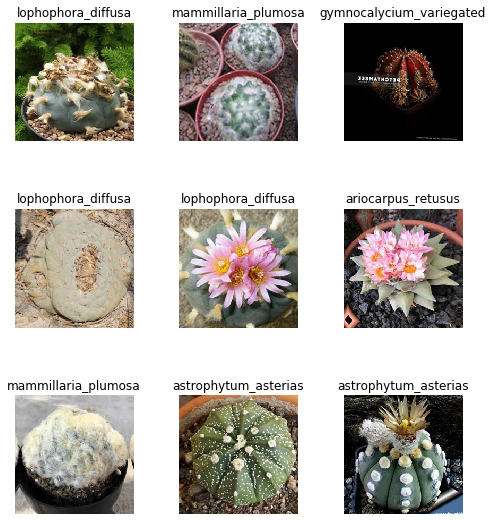

In [12]:
data.show_batch(rows=3, figsize=(7,8))

#### data previewed, let's train some model

We can essentially repeat the process as we did in lesson 1, we load a resnet model and fit a cycle

In [13]:
learn = cnn_learner(data, models.resnet34
                    , metrics=error_rate
                   )

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


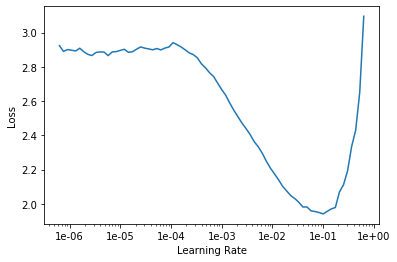

In [15]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(4, max_lr=slice(1e-3, 3e-2))

In [23]:
learn.save('cactus_classifier_demo-stage_1')

#### interpretation

In [ ]:
#learn.load('')

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

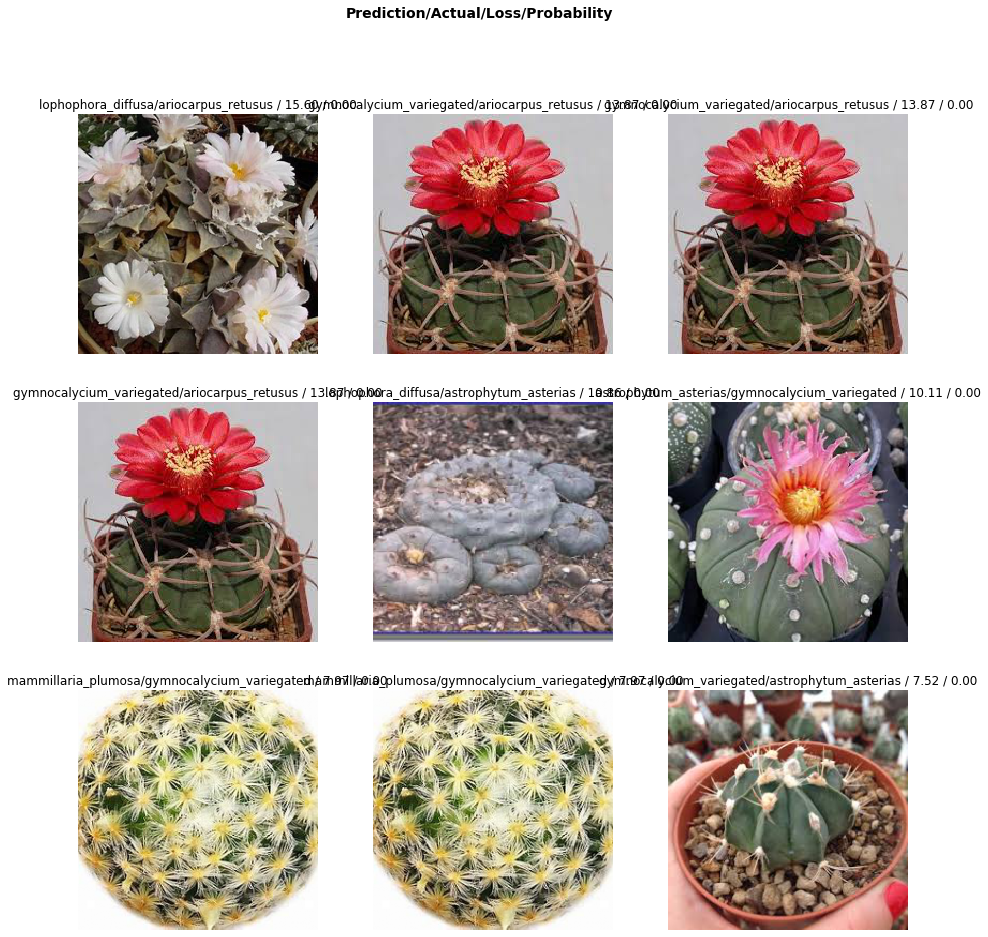

In [25]:
interp.plot_top_losses(9, figsize=(15,15))

In [26]:
interp.most_confused(min_val=3)

[('coryphantha', 'gymnocalycium_variegated', 23),
 ('astrophytum_asterias', 'gymnocalycium_variegated', 21),
 ('coryphantha', 'mammillaria_plumosa', 17),
 ('ariocarpus_retusus', 'gymnocalycium_variegated', 13),
 ('mammillaria_plumosa', 'coryphantha', 10),
 ('ariocarpus_retusus', 'lophophora_diffusa', 8),
 ('mammillaria_plumosa', 'gymnocalycium_variegated', 8),
 ('astrophytum_asterias', 'lophophora_diffusa', 6),
 ('astrophytum_asterias', 'ariocarpus_retusus', 5),
 ('lophophora_diffusa', 'ariocarpus_retusus', 5),
 ('gymnocalycium_variegated', 'ariocarpus_retusus', 4),
 ('gymnocalycium_variegated', 'coryphantha', 4),
 ('gymnocalycium_variegated', 'mammillaria_plumosa', 4),
 ('lophophora_diffusa', 'astrophytum_asterias', 4),
 ('lophophora_diffusa', 'gymnocalycium_variegated', 4),
 ('coryphantha', 'astrophytum_asterias', 3),
 ('gymnocalycium_variegated', 'astrophytum_asterias', 3),
 ('mammillaria_plumosa', 'lophophora_diffusa', 3)]

#### we note that some images are actually a bit dodgy and cause an apparent drop in performance, as opposed to the model making genuine mistakes

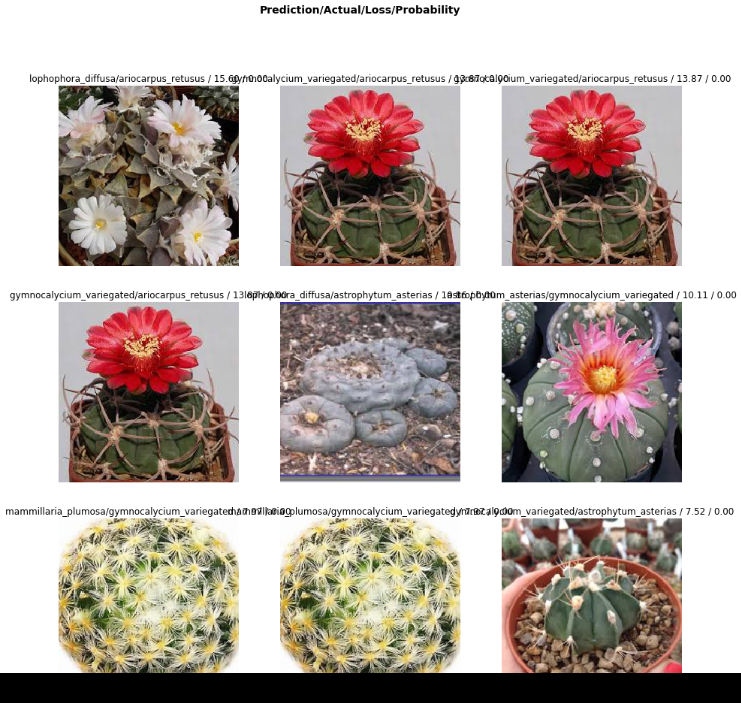

Not to mention some images are misclassified or duplicated. To this end, we can clean up some of the noise in the data. We use a tool called fastai.widgets, built by the Francisco fastai study group. We first extract the samples and their paths with the greatest losses.

In [27]:
from fastai.widgets import *
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


In [29]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('cactus_classifier_demo-stage_1');

In [38]:
#ds, ixds = DatasetFormatter().from_toplosses(learn_cln)
ds, ixds = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


...and pass the paths to the widget, where we can then relabel or delete them.

In [31]:
from fastai.widgets import ImageCleaner

In [39]:
ImageCleaner(ds, ixds, path, duplicates=True, batch_size=5)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## having cleaned the image dataset, we can retrain the model on a cleaner dataset

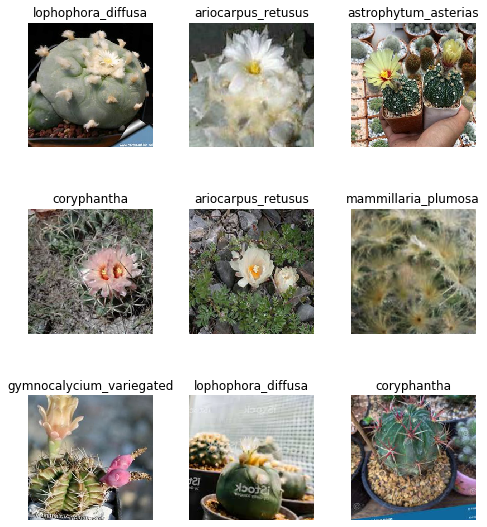

In [44]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder='.'
                                  , valid_pct=.2
                                  , ds_tfms=get_transforms()
                                  , size=224
                                  , csv_labels='cleaned.csv'
                                 ).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,8))

In [45]:
learn = cnn_learner(data, models.resnet34
                    , metrics=error_rate
                   )

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


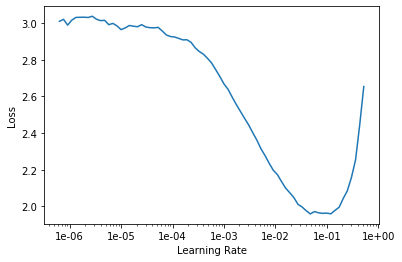

In [46]:
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(4, max_lr=slice(1e-3, 1e-2))

In [48]:
learn.save('cactus_classifier_clean-stage_1')

This seems promising. Having saved a first version, we can unfreeze the model and train some more.

In [49]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


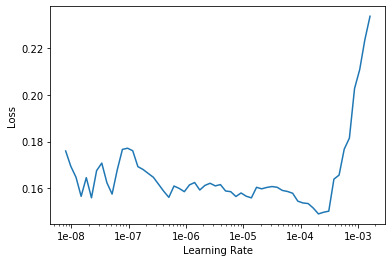

In [51]:
learn.lr_find(1e-9, 1);
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-6))

In [54]:
learn.save('cactus_classifier_clean-stage_2')

Again, we can look a bit more at the samples the model got wrong.

In [56]:
interp = ClassificationInterpretation.from_learner(learn)

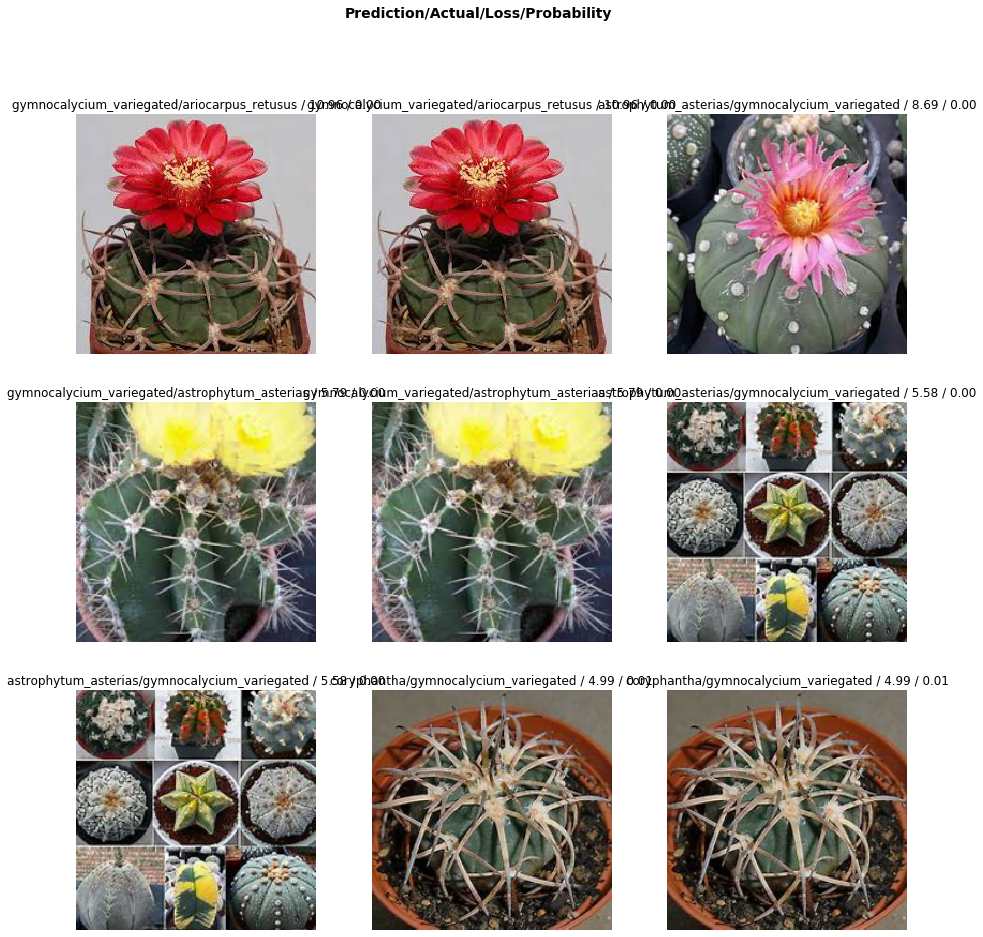

In [57]:
interp.plot_top_losses(9, figsize=(15,15))

This is interesting because for some of these pictures we can make the case that the model classifies correctly samples that are mislabelled. 

In [59]:
interp.most_confused(min_val=3)

[('coryphantha', 'gymnocalycium_variegated', 16),
 ('coryphantha', 'mammillaria_plumosa', 15),
 ('gymnocalycium_variegated', 'astrophytum_asterias', 11),
 ('lophophora_diffusa', 'astrophytum_asterias', 11),
 ('astrophytum_asterias', 'gymnocalycium_variegated', 9),
 ('mammillaria_plumosa', 'coryphantha', 8),
 ('ariocarpus_retusus', 'gymnocalycium_variegated', 5),
 ('astrophytum_asterias', 'lophophora_diffusa', 4),
 ('gymnocalycium_variegated', 'mammillaria_plumosa', 4),
 ('mammillaria_plumosa', 'gymnocalycium_variegated', 4),
 ('ariocarpus_retusus', 'lophophora_diffusa', 3),
 ('gymnocalycium_variegated', 'ariocarpus_retusus', 3),
 ('gymnocalycium_variegated', 'coryphantha', 3),
 ('lophophora_diffusa', 'ariocarpus_retusus', 3),
 ('lophophora_diffusa', 'gymnocalycium_variegated', 3)]

### Finally, we can export the model for production

In [55]:
learn.export('cactus_classifier.pkl')

### let's check the pudding

In [81]:
samples = os.listdir(path/'samples')

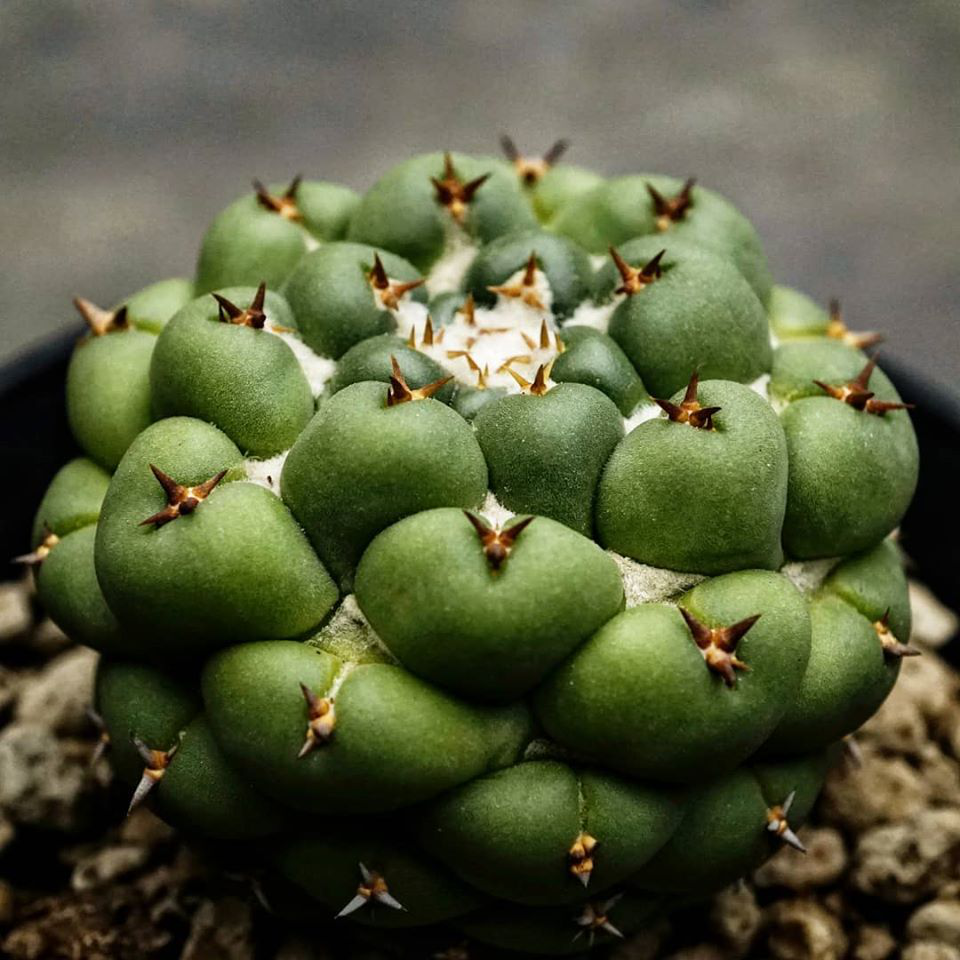

In [116]:
img = open_image(path/'samples'/'baby_coryphantha.jpg')
img

In [117]:
pred_class, pred_index, output = learn.predict(img)

In [118]:
pred_class

Category coryphantha

It's cool that the model recognizes this, because this is a baby coryphantha with underdeveloped spikes and looks a bit lophophora-esque.

In [122]:
classes, output

(['ariocarpus_retusus',
  'astrophytum_asterias',
  'coryphantha',
  'gymnocalycium_variegated',
  'lophophora_diffusa',
  'mammillaria_plumosa'],
 tensor([0.0081, 0.0449, 0.9184, 0.0118, 0.0121, 0.0049]))

## some reflections on training 

So for this mini-project, we didn't have to tune much - just some minimal learning rate search. Didn't even change the number of epochs. Had we chosen dodgy learning rate or unreasonable number of epochs, things might've broken down. Like so:

In [126]:
learn = cnn_learner(data, models.resnet34
                    , metrics=error_rate
                   )

High learning rate and the valid loss shoots up (as does the error rate).

In [125]:
learn.fit_one_cycle(1, 1.)

Small learning rate and the learning is slow, if there's learning at all.

In [127]:
learn.fit_one_cycle(10, 1e-9)

Too many epochs and there's potentially some overfit down the line, if the error starts increasing after a while. Apparently, the default fastai config already has quite a few regularizations in place, so to demonstrate this effect, we'll have them turned off, like so:

In [130]:
np.random.seed(42)
no_transforms = get_transforms(do_flip=False
                               , max_rotate=0
                               , max_zoom=1
                               , max_lighting=0
                               , max_warp=0
                              )
data = ImageDataBunch.from_csv(path, folder='.'
                                  , valid_pct=.9
                                  , ds_tfms=no_transforms
                                  , size=224
                                  , csv_labels='cleaned.csv'
                                 ).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [131]:
# this is gonna take a while, strap in, watch some badminton
learn.fit_one_cycle(10)`

Jeremy also mentions that in general validation loss should be lower than the training loss, which suggests that the model is learning enough. Note that with heavy augmentation it's normal that training loss should be higher as it's made harder. I suppose this applies if the validation set. If the validation  set is fixed independently of the training set, maybe have a look of the validation set if it's too easy. Otherwise, just split another validation set from the training set and see if it changes.

## final reflections

All in all, this is quite straightforward - not easy at first, but simple enough and easy to expand on. I suppose the cactuses (cactii ?) images aren't challenging enough or of high enough resolution to warrant more powerful techniques/models. I mean the model practically correct the mislabelled samples. Next, I suppose I could expand to more classes, more granular categories. Note that the more categories the harder to get the right data and the closer it gets to a .